# Text Analytics of The Grimm Brother's Tales

## Sentiment Analysis
 


In [1]:
!pip install textblob 
!python -m textblob.download_corpora 

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [2]:
from textblob import TextBlob, Word, Blobber

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("C:/Users/Thomas/Documents/HIT/DM/data/grimm-tales.tab", sep="\t")
df.shape

(56, 6)

In [17]:
### the first two rows are descriptive of the data, we have to delete them
df = df[2:len(df)]
df = df.reset_index()
df.head()

,index,ATU Topic,Title,Abstract,Content,ATU Numerical,ATU Type
0,2,Tales of Magic,A Tale About the Boy Who Went Forth to Learn W...,A simple boy who just wants to be frightened.,"A certain father had two sons, the elder of wh...",326.0,Supernatural Adversaries
1,3,Tales of Magic,Brier Rose,An offended witch curses a young princess to d...,A king and queen once upon a time reigned in a...,410.0,Supernatural or Enchanted Relatives
2,4,Animal Tales,Cat and Mouse in Partnership,"A mouse lives with a cat, and the cat eats all...",A certain cat had made the acquaintance of a m...,15.0,Wild Animals
3,5,Tales of Magic,Cinderella,The familiar story of a girl marrying a prince...,The wife of a rich man fell sick; and when she...,510A,Supernatural Helpers
4,6,Jokes and Anecdotes,Clever Elsie,A husband and wife have a clever daughter who ...,There was once a man who had a daughter who wa...,1450.0,Stories about a Woman


## Retrieving the sentiment of a text
 
For analyzing sentiments linguistic experts have build a dictionary of the most common used words in each language and have given each word a value determining the degree of positiveness, negativeness of neutrality of each word. The total sentiment of a text is calculated by averaging the sentiment of all the words that compose the text. This measure is expressed as the <i>Polarity</i> of the text and can range from -1 for highly negative sentiment to +1 for highly positive sentiment. 
 
Additionally, some words are known to expose the subjectivity of a statement. For example the word <i> think </i> is highly subjective and points to a personal opinion while the word <i> know </i> is pointing to some kind of information and has lower subjectivity. The subjectivity measure ranges from 0 to 1.


In [18]:
text = TextBlob(df.loc[1,'Content'])
print (text)
text.sentiment

A king and queen once upon a time reigned in a country a great way off, where there were in those days fairies. Now this king and queen had plenty of money, and plenty of fine clothes to wear, and plenty of good things to eat and drink, and a coach to ride out in every day: but though they had been married many years they had no children, and this grieved them very much indeed. But one day as the queen was walking by the side of the river, at the bottom of the garden, she saw a poor little fish, that had thrown itself out of the water, and lay gasping and nearly dead on the bank. Then the queen took pity on the little fish, and threw it back again into the river; and before it swam away it lifted its head out of the water and said, ‘I know what your wish is, and it shall be fulfilled, in return for your kindness to me--you will soon have a daughter.’ What the little fish had foretold soon came to pass; and the queen had a little girl, so very beautiful that the king could not cease loo

Sentiment(polarity=0.1791746698679472, subjectivity=0.4956742697078835)

In [19]:
text = TextBlob(df.loc[3,'Content'])
print (text)
text.sentiment

The wife of a rich man fell sick; and when she felt that her end drew nigh, she called her only daughter to her bed-side, and said, ‘Always be a good girl, and I will look down from heaven and watch over you.’ Soon afterwards she shut her eyes and died, and was buried in the garden; and the little girl went every day to her grave and wept, and was always good and kind to all about her. And the snow fell and spread a beautiful white covering over the grave; but by the time the spring came, and the sun had melted it away again, her father had married another wife. This new wife had two daughters of her own, that she brought home with her; they were fair in face but foul at heart, and it was now a sorry time for the poor little girl. ‘What does the good-for-nothing want in the parlour?’ said they; ‘they who would eat bread should first earn it; away with the kitchen-maid!’ Then they took away her fine clothes, and gave her an old grey frock to put on, and laughed at her, and turned her in

Sentiment(polarity=0.08540914005626084, subjectivity=0.42659411125703295)

In [11]:
text = TextBlob(df.loc[10,'overview'])
print (text)
text.sentiment

Lester Burnham, a depressed suburban father in a mid-life crisis, decides to turn his hectic life around after developing an infatuation with his daughter's attractive friend.


Sentiment(polarity=0.4, subjectivity=0.5)

In [20]:
### horror movie
text = TextBlob(df.loc[29,'Content'])
print (text)
text.sentiment

The fox once came to a meadow in which was a flock of fine fat geese, on which he smiled and said, “I come in the nick of time, you are sitting together quite beautifully, so that I can eat you up one after the other.” The geese cackled with terror, sprang up, and began to wail and beg piteously for their lives. But the fox would listen to nothing, and said, “There is no mercy to be had! You must die.” At length one of them took heart and said, “If we poor geese are to yield up our vigorous young lives, show us the only possible favour and allow us one more prayer, that we may not die in our sins, and then we will place ourselves in a row, so that you can always pick yourself out the fattest.” “Yes,” said the fox, “that is reasonable, and a pious request. Pray away, I will wait till you are done.” Then the first began a good long prayer, for ever saying, “Ga! Ga!” and as she would make no end, the second did not wait until her turn came, but began also, “Ga! Ga!” The third and fourth f

Sentiment(polarity=0.15696271929824562, subjectivity=0.437280701754386)

In [21]:
print(text.sentiment[0],text.sentiment[1])

0.15696271929824562 0.437280701754386


## Calculating the sentiment of each tale  

In [22]:
n = df.shape[0]
dfsent = {}

for i in range(0,n):
    #idx = df.loc[i,'id']
    ### Preprocessing
    text = df.loc[i,'Content']
    ### skip movies with empty overview
    if text != None:
        text = TextBlob(text)
        ### tokenizing
        dfsent[df.Title[i]] = [text.sentiment[0],text.sentiment[1]]



In [23]:
dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['polarity','subjectivity']

In [24]:
dfsent.head()

,polarity,subjectivity
A Tale About the Boy Who Went Forth to Learn What Fear Was,0.030431,0.467210
Brier Rose,0.179175,0.495674
Cat and Mouse in Partnership,0.209495,0.472181
Cinderella,0.085409,0.426594
Clever Elsie,0.073184,0.437495


In [25]:
#dfsent['sentiment'] = [1 if dfsent.polarity > 0 else -1 if dfsent.polarity < 0 else 0]
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity<0,'sentiment'] = -1
dfsent.loc[dfsent.polarity>0,'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

In [26]:
dfsent.head()

,polarity,subjectivity,sentiment
A Tale About the Boy Who Went Forth to Learn What Fear Was,0.030431,0.467210,1
Brier Rose,0.179175,0.495674,1
Cat and Mouse in Partnership,0.209495,0.472181,1
Cinderella,0.085409,0.426594,1
Clever Elsie,0.073184,0.437495,1


In [27]:
dfsent.dtypes

polarity         float64
subjectivity     float64
sentiment       category
dtype: object

In [28]:
[dfsent.groupby('sentiment').count()]

[           polarity  subjectivity
 sentiment                        
 -1                6             6
 1                48            48]

In [29]:
dfsent.groupby('sentiment').count()['polarity']


sentiment
-1     6
1     48
Name: polarity, dtype: int64

## Analyzing the sentiment by Topic

In [31]:
dfsent['Title'] = dfsent.index

In [32]:
topic = pd.merge(df,dfsent, on='Title', how='inner')
topic.head()

,index,ATU Topic,Title,Abstract,Content,ATU Numerical,ATU Type,polarity,subjectivity,sentiment
0,2,Tales of Magic,A Tale About the Boy Who Went Forth to Learn W...,A simple boy who just wants to be frightened.,"A certain father had two sons, the elder of wh...",326.0,Supernatural Adversaries,0.030431,0.467210,1
1,3,Tales of Magic,Brier Rose,An offended witch curses a young princess to d...,A king and queen once upon a time reigned in a...,410.0,Supernatural or Enchanted Relatives,0.179175,0.495674,1
2,4,Animal Tales,Cat and Mouse in Partnership,"A mouse lives with a cat, and the cat eats all...",A certain cat had made the acquaintance of a m...,15.0,Wild Animals,0.209495,0.472181,1
3,5,Tales of Magic,Cinderella,The familiar story of a girl marrying a prince...,The wife of a rich man fell sick; and when she...,510A,Supernatural Helpers,0.085409,0.426594,1
4,6,Jokes and Anecdotes,Clever Elsie,A husband and wife have a clever daughter who ...,There was once a man who had a daughter who wa...,1450.0,Stories about a Woman,0.073184,0.437495,1


In [33]:
topic.groupby('ATU Topic').mean()['polarity']

ATU Topic
Animal Tales                0.091791
Jokes and Anecdotes         0.163562
Realistic Tales             0.113895
Tales of Magic              0.100030
Tales of the Stupid Ogre    0.136682
Name: polarity, dtype: float64

In [34]:
topic.groupby('ATU Topic').mean()['subjectivity']

ATU Topic
Animal Tales                0.463544
Jokes and Anecdotes         0.488172
Realistic Tales             0.507244
Tales of Magic              0.486523
Tales of the Stupid Ogre    0.531951
Name: subjectivity, dtype: float64

In [37]:
sent1 = topic.groupby('ATU Topic').mean()['polarity']

In [38]:
print(sent1.index)
print(sent1)

Index(['Animal Tales', 'Jokes and Anecdotes', 'Realistic Tales',
       'Tales of Magic', 'Tales of the Stupid Ogre'],
      dtype='object', name='ATU Topic')
ATU Topic
Animal Tales                0.091791
Jokes and Anecdotes         0.163562
Realistic Tales             0.113895
Tales of Magic              0.100030
Tales of the Stupid Ogre    0.136682
Name: polarity, dtype: float64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

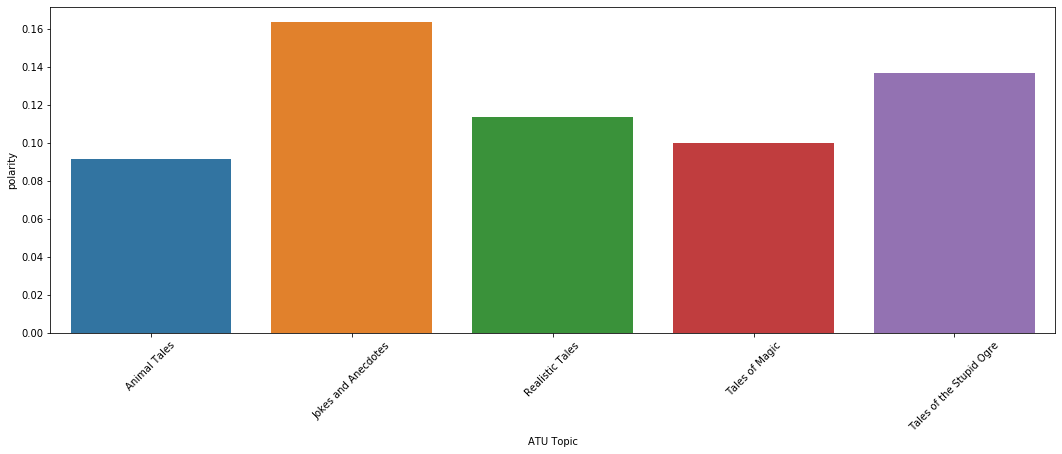

In [39]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x=sent1.index, y=sent1)
plt.xticks(rotation=45)

## Analyzing the sentiment by Type

In [40]:
topic.groupby('ATU Type').mean()['polarity']

ATU Type
Domestic Animals                              -0.031779
Jokes about Clergymen and Religious Figures    0.165770
Man Kills Ogre                                 0.136682
Obstinate Wife Learns to Obey                  0.182370
Other Animals and Objects                      0.140462
Other Tales of the Supernatural                0.180629
Proofs of Fidelity and Innocence               0.130041
Stories about Married Couples                  0.161012
Stories about a Man                            0.208923
Stories about a Woman                          0.073184
Supernatural Adversaries                       0.075875
Supernatural Helpers                           0.094572
Supernatural Powers or Knowledge               0.135999
Supernatural Tasks                             0.111710
Supernatural or Enchanted Relatives            0.093031
Tales of Fate                                  0.067634
The Man Marries the Princess                   0.075535
Wild Animal and Domestic Animals       

In [41]:
topic.groupby('ATU Type').mean()['subjectivity']

ATU Type
Domestic Animals                               0.453460
Jokes about Clergymen and Religious Figures    0.510195
Man Kills Ogre                                 0.531951
Obstinate Wife Learns to Obey                  0.504432
Other Animals and Objects                      0.472504
Other Tales of the Supernatural                0.503961
Proofs of Fidelity and Innocence               0.518450
Stories about Married Couples                  0.530609
Stories about a Man                            0.481279
Stories about a Woman                          0.437495
Supernatural Adversaries                       0.479383
Supernatural Helpers                           0.467618
Supernatural Powers or Knowledge               0.479649
Supernatural Tasks                             0.565290
Supernatural or Enchanted Relatives            0.506813
Tales of Fate                                  0.495675
The Man Marries the Princess                   0.510417
Wild Animal and Domestic Animals       

In [42]:
sent1 = topic.groupby('ATU Type').mean()['polarity']

In [43]:
print(sent1.index)
print(sent1)

Index(['Domestic Animals', 'Jokes about Clergymen and Religious Figures',
       'Man Kills Ogre', 'Obstinate Wife Learns to Obey',
       'Other Animals and Objects', 'Other Tales of the Supernatural',
       'Proofs of Fidelity and Innocence', 'Stories about Married Couples',
       'Stories about a Man', 'Stories about a Woman',
       'Supernatural Adversaries', 'Supernatural Helpers',
       'Supernatural Powers or Knowledge', 'Supernatural Tasks',
       'Supernatural or Enchanted Relatives', 'Tales of Fate',
       'The Man Marries the Princess', 'Wild Animal and Domestic Animals',
       'Wild Animals', 'Wild Animals and Humans'],
      dtype='object', name='ATU Type')
ATU Type
Domestic Animals                              -0.031779
Jokes about Clergymen and Religious Figures    0.165770
Man Kills Ogre                                 0.136682
Obstinate Wife Learns to Obey                  0.182370
Other Animals and Objects                      0.140462
Other Tales of the Supern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

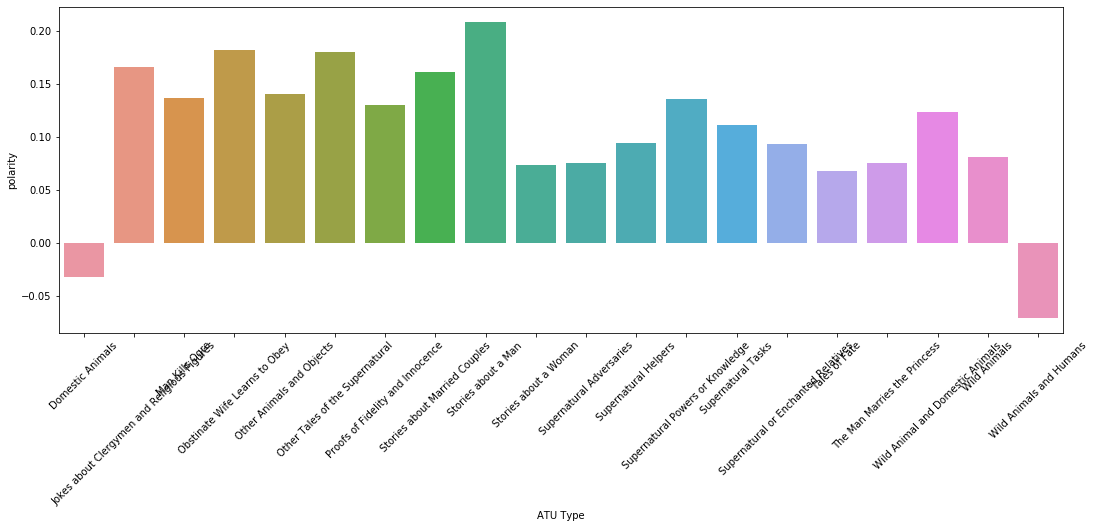

In [44]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x=sent1.index, y=sent1)
plt.xticks(rotation=45)